In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image

import os, sys, re, datetime, time
from pathlib import Path

pj_dir = Path(os.getcwd()).parents[0]
data_dir = pj_dir/'data'
img_dir = pj_dir/'images'
src_dir = pj_dir/'src'
sys.path.append(str(src_dir))

from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns
plt.style.use("bmh")
import numpy as np
import pandas as pd
import dask.dataframe as dd

from tqdm import tqdm_notebook
from dotenv import load_dotenv

In [2]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 4)
plt.rcParams["font.family"] = "IPAexGothic"
import logging
logging.basicConfig(level=logging.INFO)

In [30]:
from matplotlib.ticker import MaxNLocator

In [3]:
os.listdir(pj_dir/'advent_calendar/data')

['category.pickle',
 'article.pickle',
 'calendar.pickle',
 'article.csv',
 'category2018.pickle',
 'article2018.csv',
 'calendar2018.pickle']

In [27]:
df.to_pickle(pj_dir/'advent_calendar/data/article_all.pickle')

In [3]:
df = pd.read_pickle(pj_dir/'advent_calendar/data/article_all.pickle')

In [43]:
df_cal = pd.read_pickle(pj_dir/'advent_calendar/data/calendar2018.pickle')

In [19]:
dft = df.query('year == 2018')

In [4]:
map_rename = {
    'hatebu': 'はてブ数', 'n_like': 'いいね数'
}

In [5]:
df = df.rename(columns=map_rename)

In [6]:
df.head()

,author,calendar,category,content,はてブ数,n_comment,いいね数,title,url,year
0,@Lewuathe,Apache Spark,未設定,この記事はApache Spark Advent Calendar二日目の記事として書きまし...,14,0,15,SparkとParameter Server,http://qiita.com/Lewuathe/items/6dc929c862d2c3...,2015
1,@giwa,Apache Spark,未設定,こちらの記事を翻訳しました。\nApache Spark 1.6.0 が開発開始され、メモリ...,1,0,16,[翻訳] Spark Memory Management since 1.6.0,http://qiita.com/giwa/items/96cc6cc9ea74aae83e2e,2015
2,NaN,Apache Spark,未設定,NaN,0,0,0,Asakusa on Spark,http://blog.goo.ne.jp/hishidama/e/64a17bdd53ba...,2015
3,NaN,Apache Spark,未設定,NaN,0,0,0,Sparkはマルチスレッドです,http://blog.goo.ne.jp/hishidama/e/d55372a996f5...,2015
4,@potix2,Apache Spark,未設定,この記事はApache Spark Advent Calendar 2015の6日目の記事で...,0,0,7,SparkからGoogleスプレッドシートへアクセスしてみた,http://qiita.com/potix2/items/b186e750259610e4...,2015


In [7]:
grp_year = df.groupby('year')

In [8]:
df_year_abs = grp_year.agg({'title': 'size', 'いいね数': 'sum', 'はてブ数': 'sum'}).rename(columns={'title': '記事数'})

In [35]:
df_year_abs.to_clipboard()
df_year_abs

,記事数,いいね数,はてブ数
year,,,
2015,6687,172396,79984
2016,9061,144690,89651
2017,10866,150965,88385
2018,11469,86743,50440


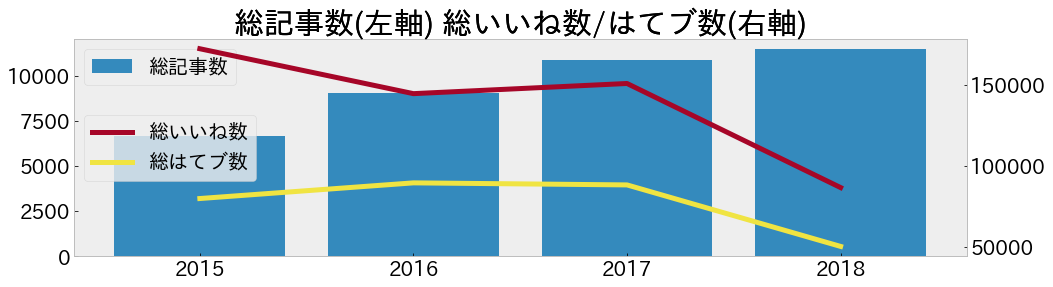

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(df_year_abs.index, df_year_abs['記事数'].values, label='総記事数', color='C0')
ax1.legend(fontsize=20)

ax2 = ax1.twinx()
ax2.plot(df_year_abs.index, df_year_abs['いいね数'].values, linewidth=5, label='総いいね数', color='C1')
ax2.plot(df_year_abs.index, df_year_abs['はてブ数'].values, linewidth=5, label='総はてブ数', color='C8')

for ax in [ax1, ax2]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('総記事数(左軸) 総いいね数/はてブ数(右軸)', fontsize=30)
    ax.grid(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', labelsize=20)
    
ax2.legend(fontsize=20, loc='center left')

In [90]:
df2018 = df.query('year == 2018')

In [45]:
map_cal_url = df_cal.set_index('name')['url'].to_dict()

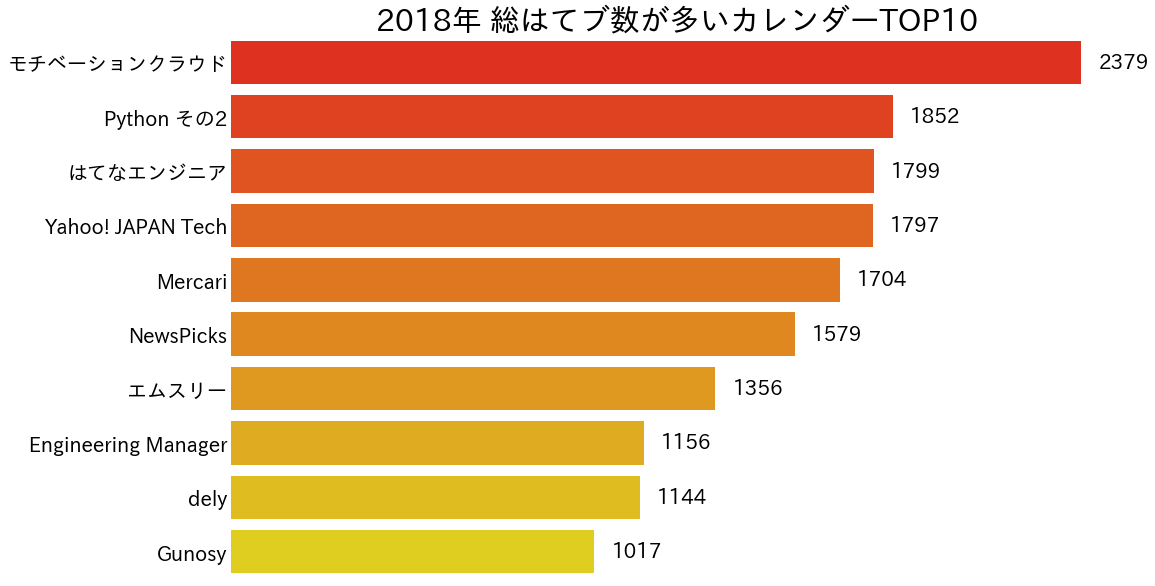

In [109]:
s = df2018.groupby('calendar')['はてブ数'].sum().sort_values(ascending=False)[:10]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'calendar': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 総はてブ数が多いカレンダーTOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

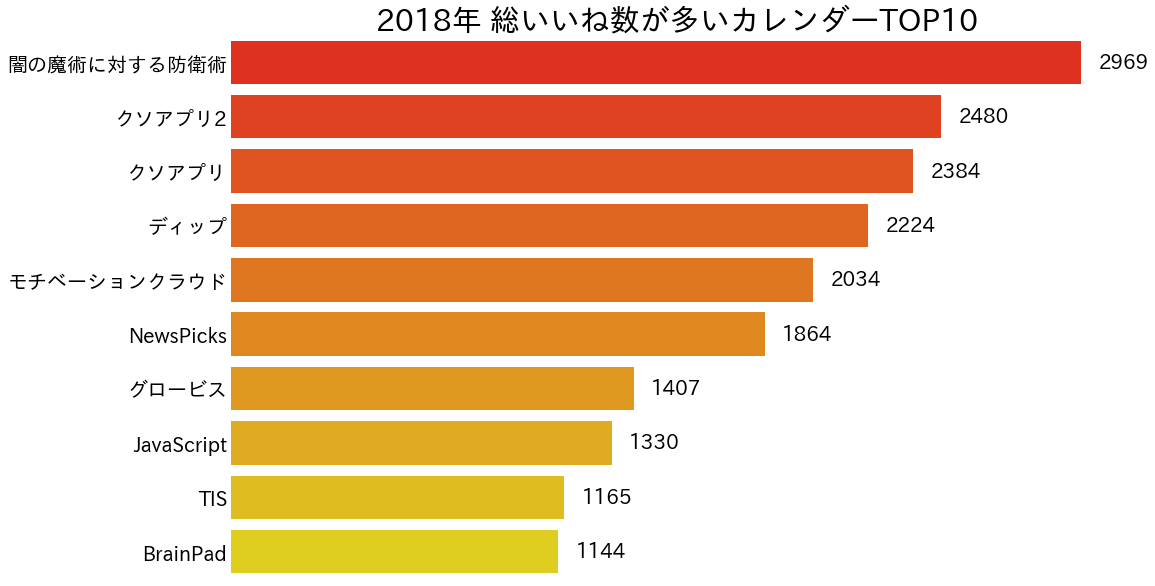

In [127]:
s = df2018.groupby('calendar')['いいね数'].sum().sort_values(ascending=False)[:10]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'calendar': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 総いいね数が多いカレンダーTOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

In [128]:
df_hatebu = s.to_frame('いいね数').reset_index()
df_hatebu['url'] = df_hatebu['calendar'].map(map_cal_url)

In [130]:
df_hatebu.to_clipboard(sep=';')

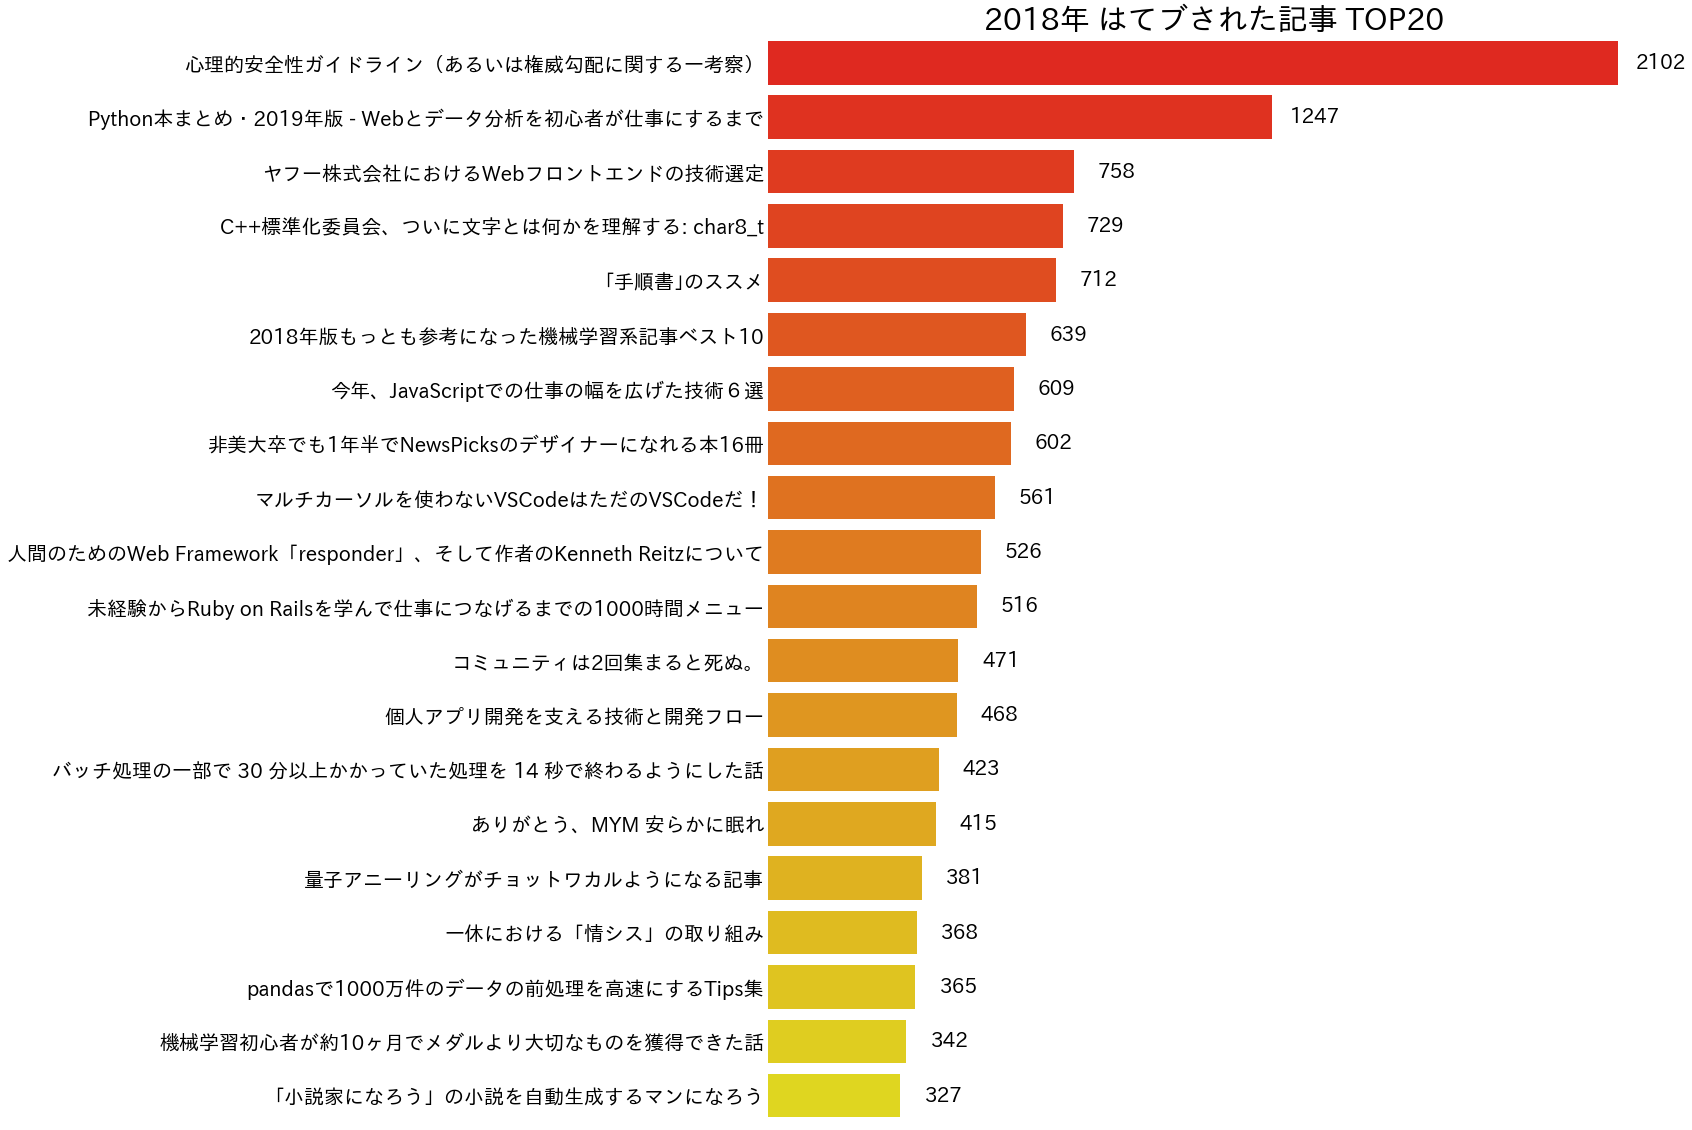

In [108]:
s = df2018.sort_values('はてブ数', ascending=False).set_index('title')['はてブ数'][:20]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'title': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 はてブされた記事 TOP20', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

In [116]:
df2018.sort_values('はてブ数', ascending=False).set_index('title')[['はてブ数', 'url', 'author', 'year']].head(20).to_clipboard(sep=';')

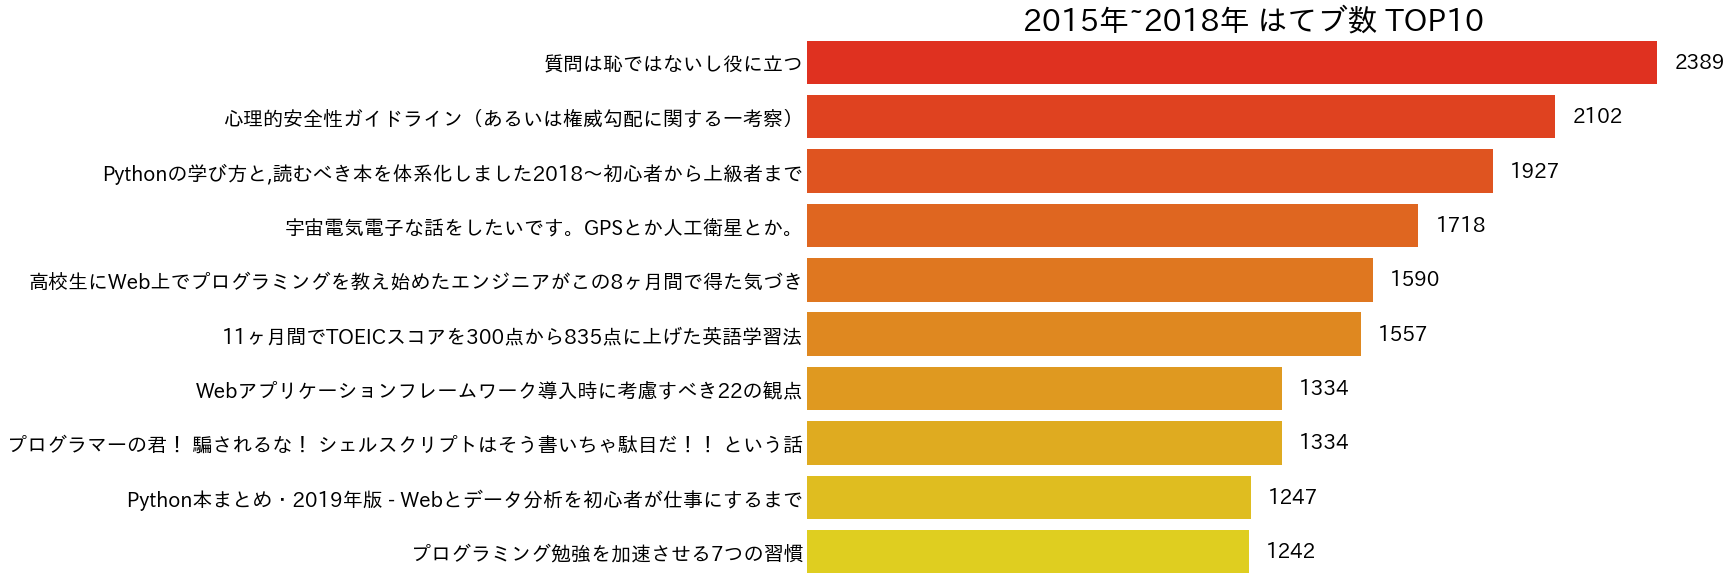

In [157]:
s = df.sort_values('はてブ数', ascending=False).set_index('title')['はてブ数'][:10]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'title': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2015年~2018年 はてブ数 TOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

In [161]:
df2018.sort_values('はてブ数', ascending=False).set_index('title')[['はてブ数', 'いいね数', 'url', 'author', 'year']].head(20).to_clipboard(sep=';')

In [118]:
categories = df['category'].unique().tolist()

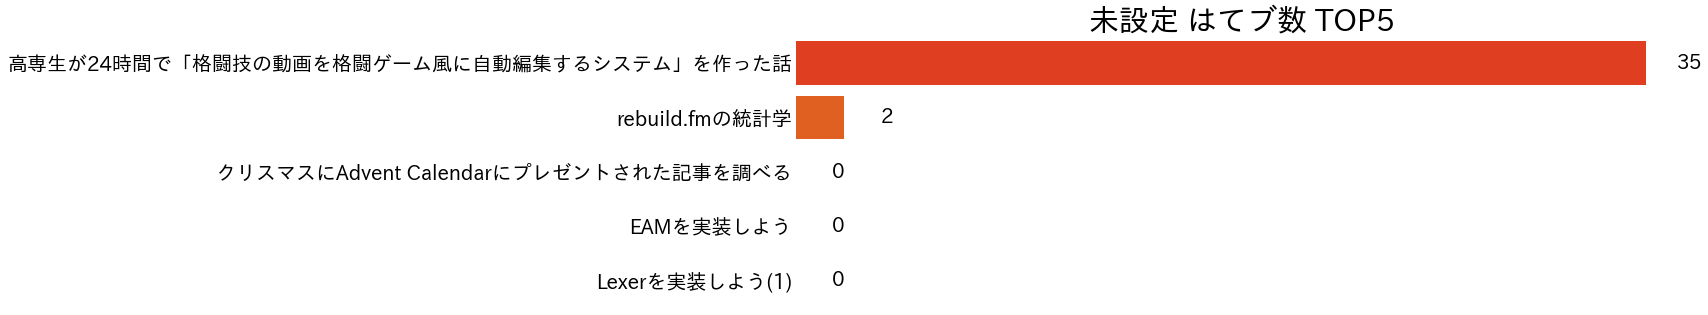

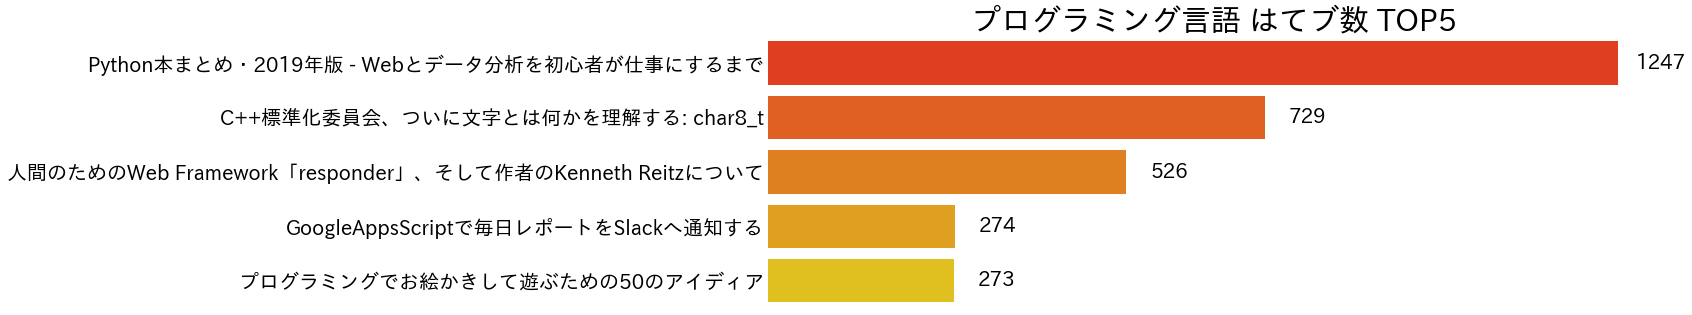

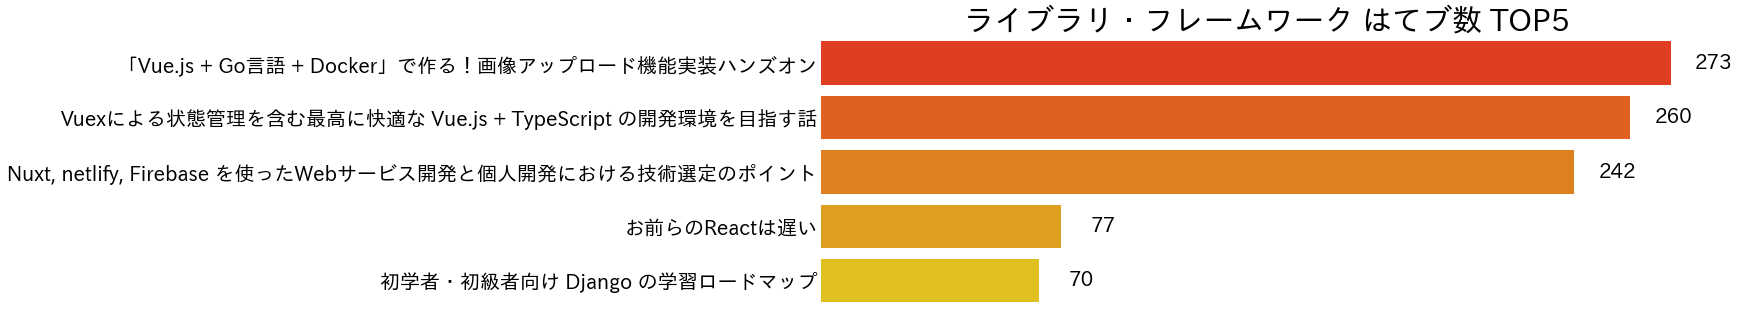

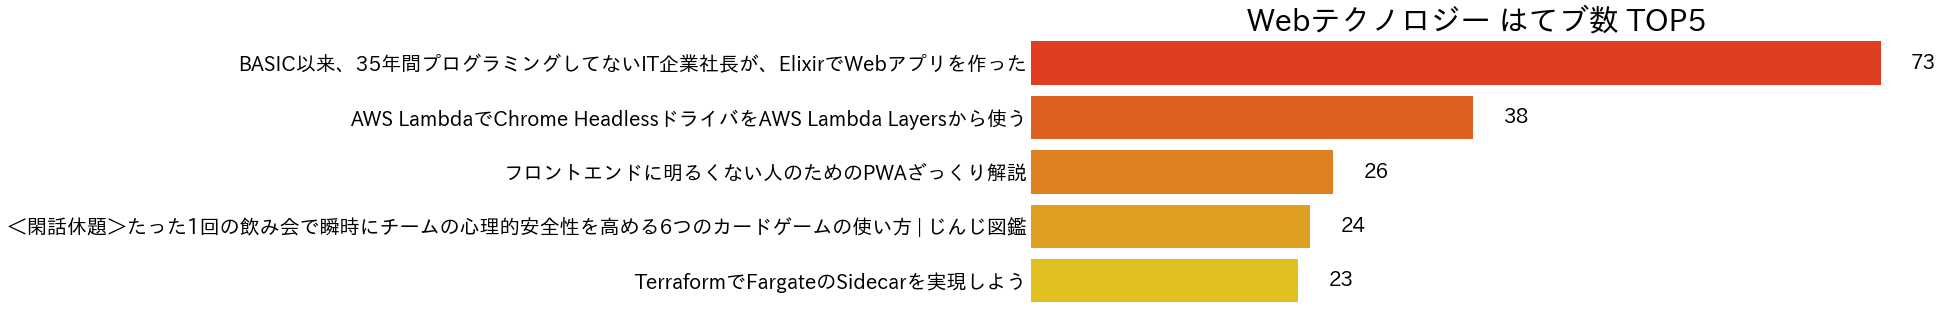

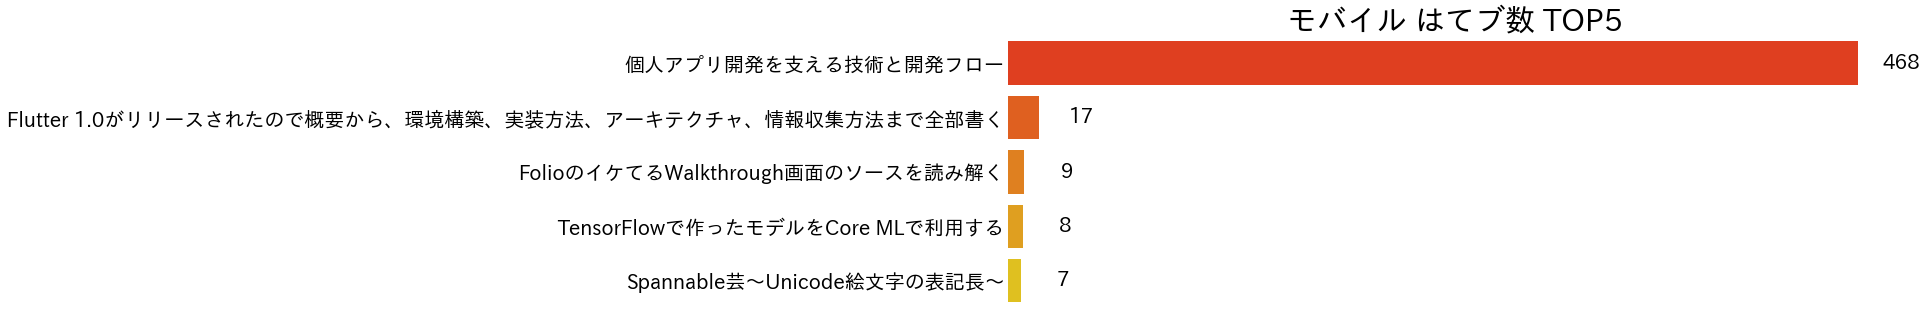

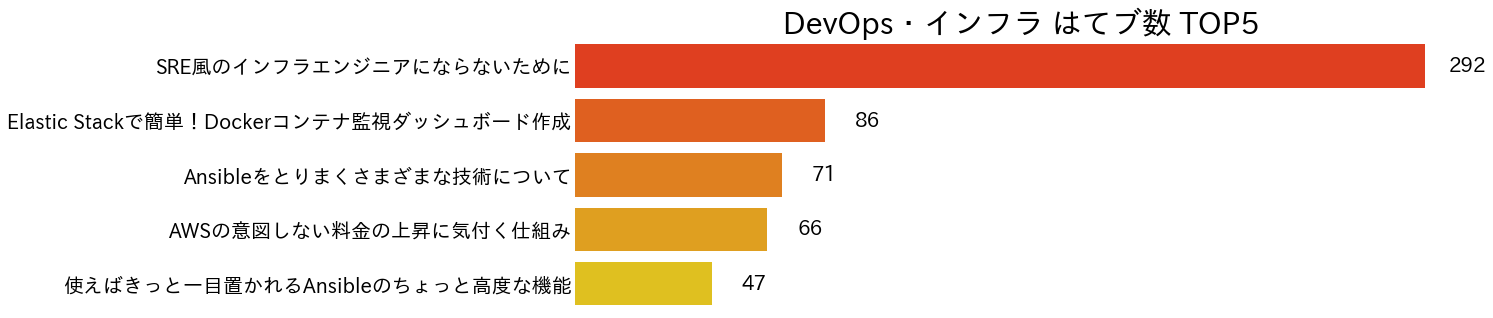

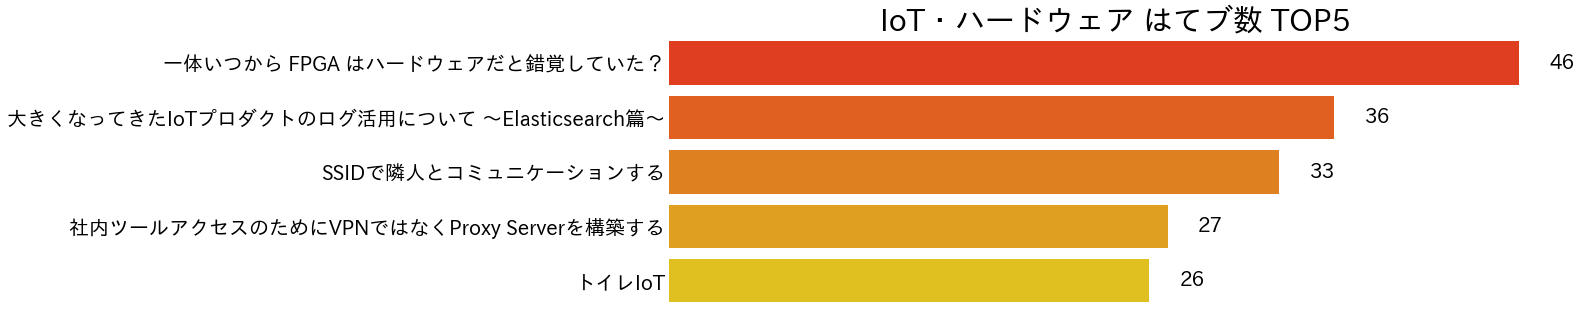

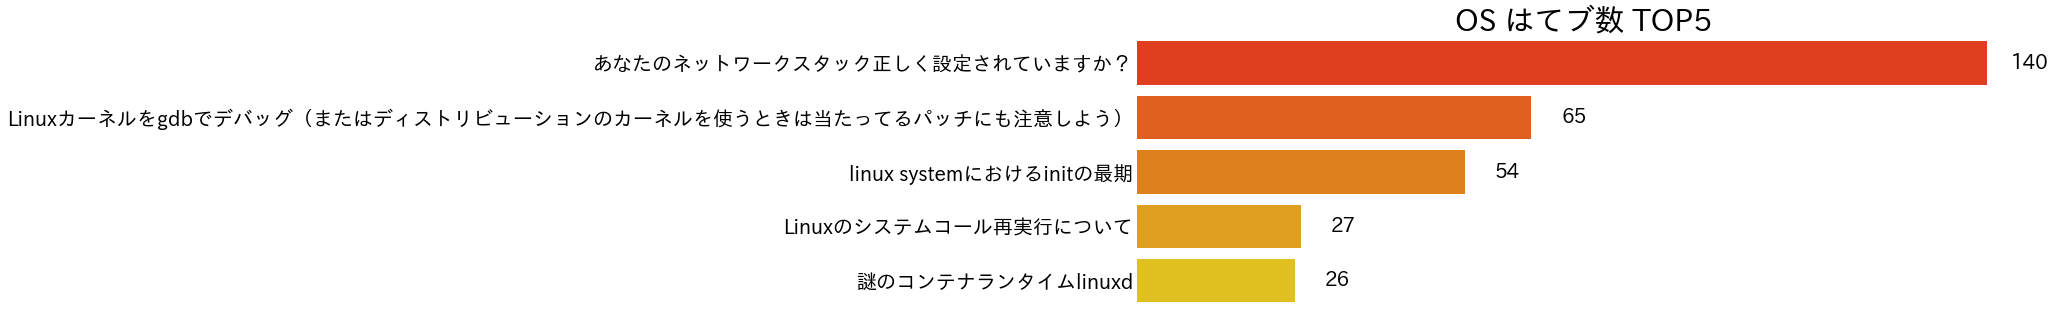

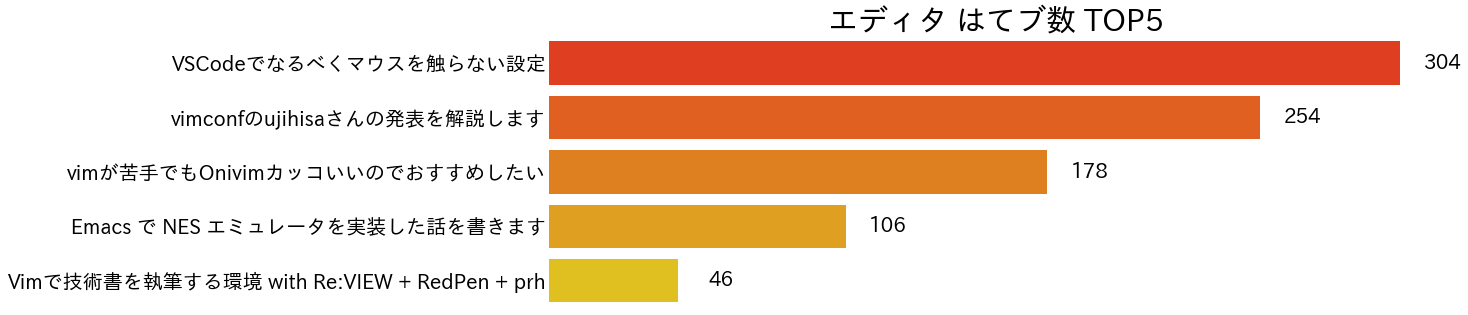

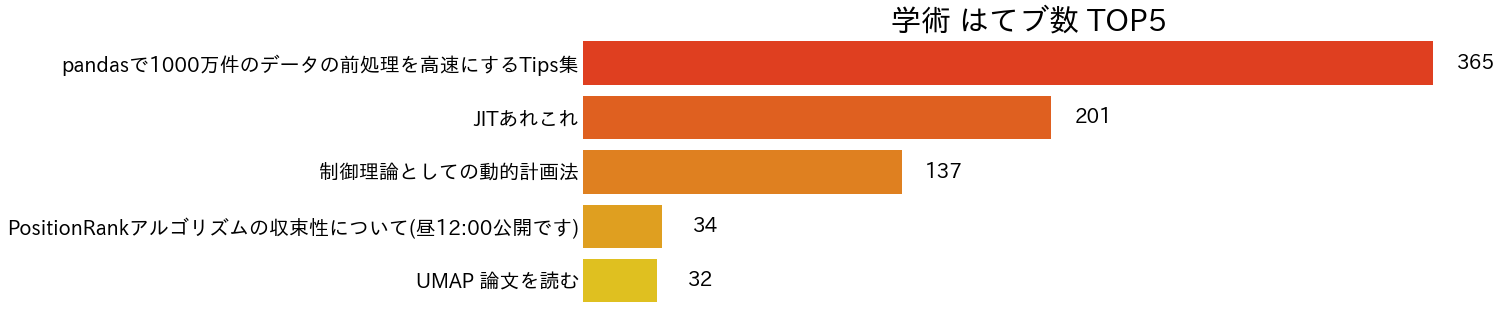

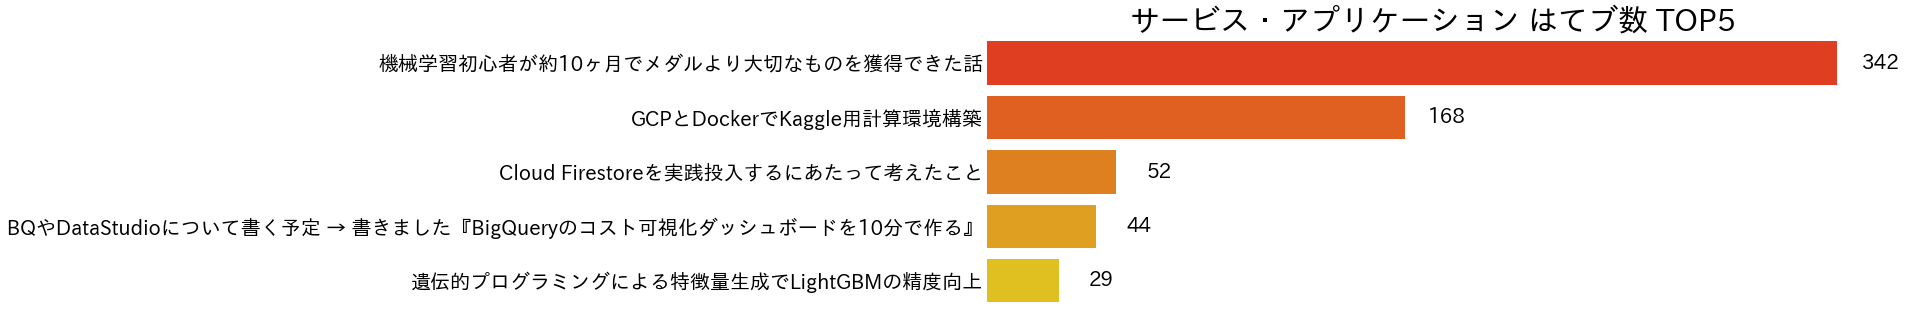

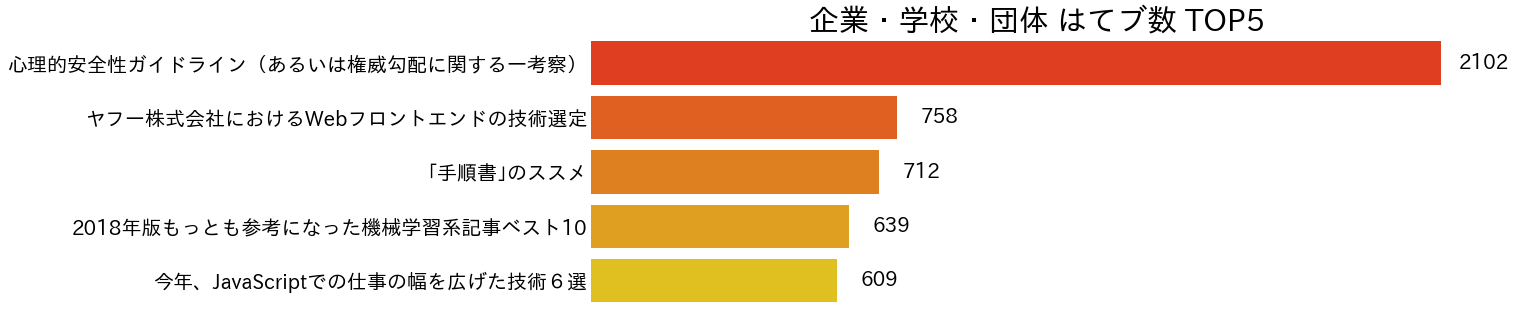

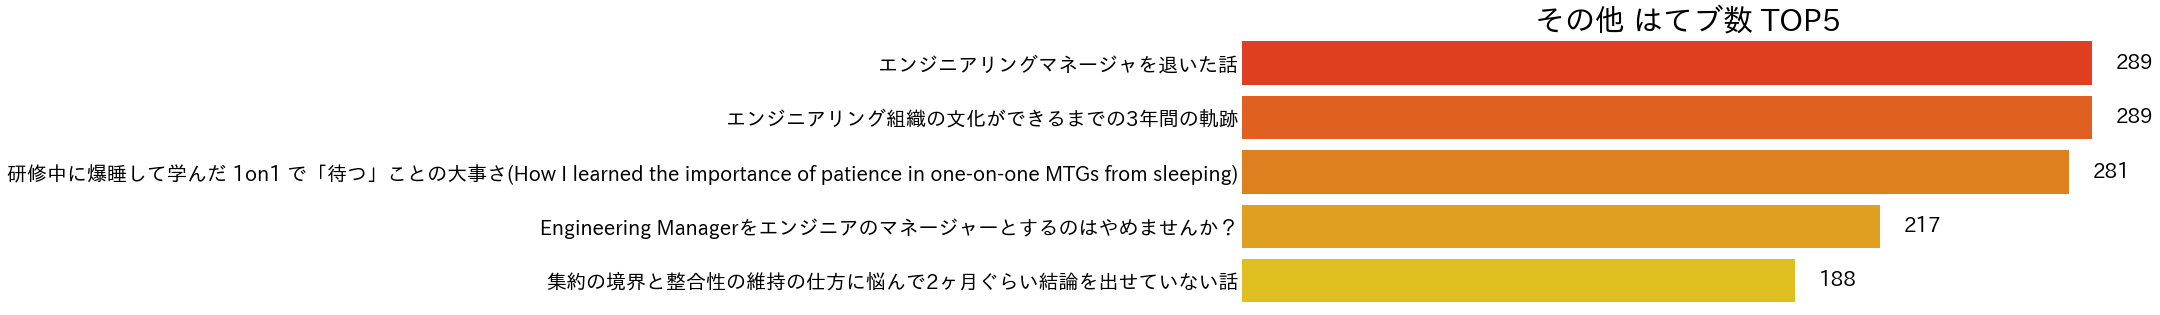

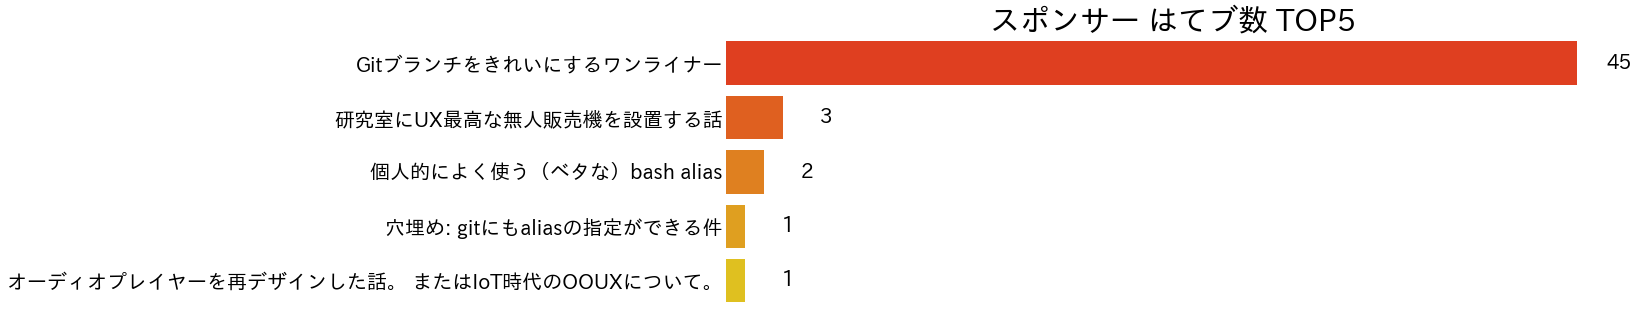

In [124]:
for category in categories:
    tmp_df = df2018.query('category == @category')
    s = tmp_df.sort_values('はてブ数', ascending=False).set_index('title')['はてブ数'][:5]

    n = s.shape[0]
    if n == 0:
        continue
    
    fig = plt.figure(figsize=(16,1*n))

    tmp_df = s.to_frame('value').reset_index().rename(columns={'title': 'name'})
    ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
    max_ = tmp_df['value'].max()

    for i, (_, row) in enumerate(tmp_df.iterrows()):
        text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

    [spine.set_visible(False) for spine in ax.spines.values()]
    ax.tick_params(bottom=False, left=False, labelbottom=False)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'{category} はてブ数 TOP5', fontsize=30)
    ax.patch.set_facecolor('white') 

    ax.patch.set_alpha(0)
    plt.grid(False)

In [140]:
ls_cat = []
for category in categories:
    tmp_df = df2018.query('category == @category').sort_values('はてブ数', ascending=False).head(3)
    tmp_df = tmp_df[['category', 'author', 'title', 'はてブ数', 'いいね数', 'url']]
    ls_cat.append(tmp_df)

In [141]:
df_by_cat = pd.concat(ls_cat)

In [142]:
df_by_cat.to_clipboard(sep=';')

Text(0,0.5,'log(はてブ数)+1')

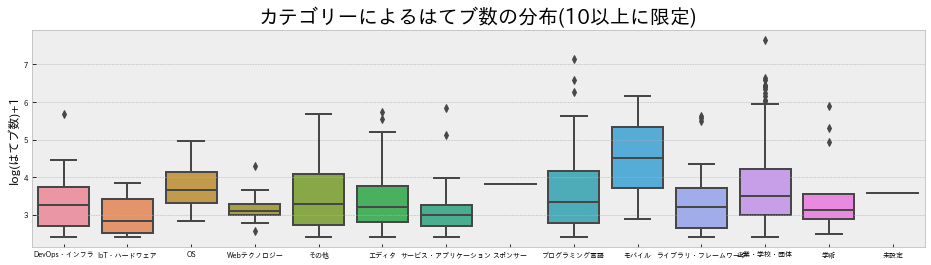

In [147]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df2018.query('はてブ数 >= 10').sort_values('category'), x='category', y='はてブ数_log1p')
ax.set_title('カテゴリーによるはてブ数の分布(10以上に限定)', fontsize=20)
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('')
ax.set_ylabel('log(はてブ数)+1')

Text(0,0.5,'log(いいね数)+1')

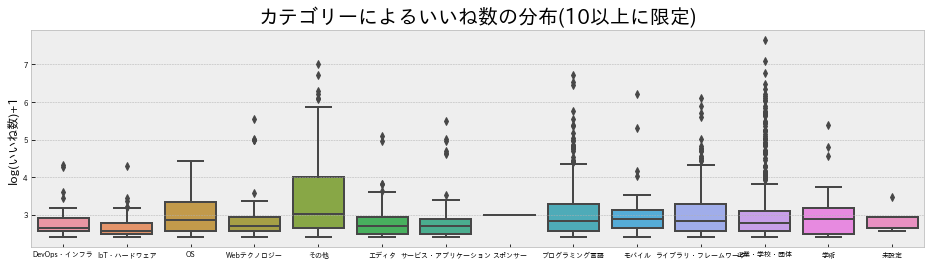

In [148]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df2018.query('いいね数 >= 10').sort_values('category'), x='category', y='いいね数_log1p')
ax.set_title('カテゴリーによるいいね数の分布(10以上に限定)', fontsize=20)
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('')
ax.set_ylabel('log(いいね数)+1')

In [149]:
%store -r url_author_map
%store -r url_day_map

In [150]:
df['author'] = df['url'].map(url_author_map)
df['day'] = df['url'].map(url_day_map)

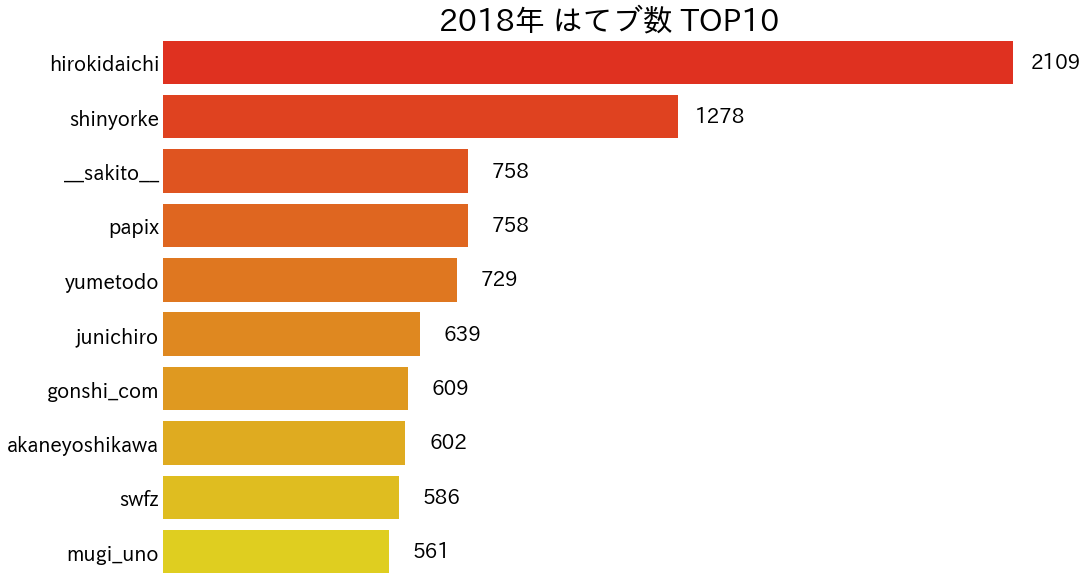

In [156]:
s = df2018.groupby('author')['はてブ数'].sum().sort_values(ascending=False)[:10]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'author': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 はてブ数 TOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

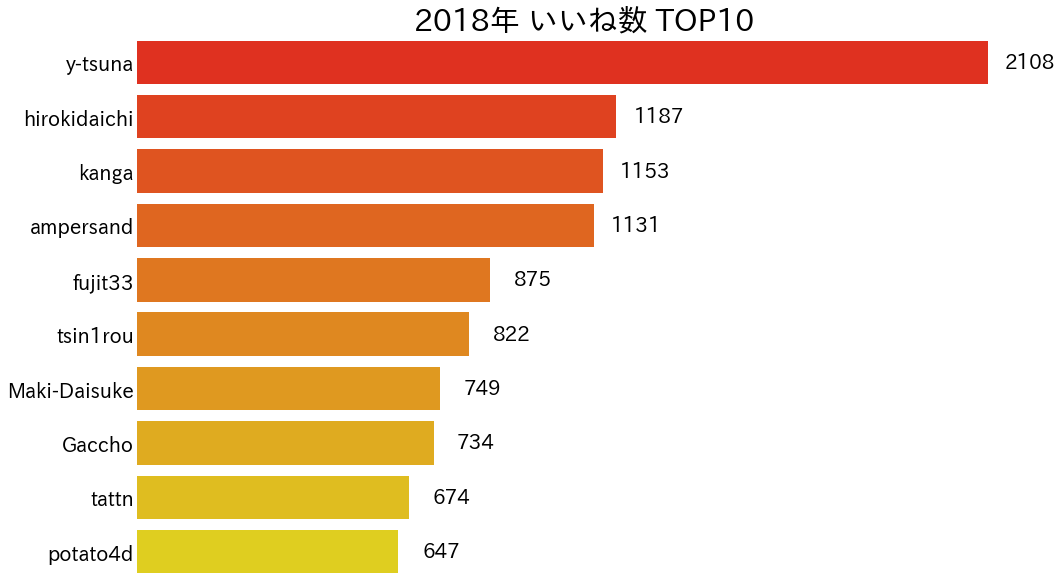

In [155]:
s = df2018.groupby('author')['いいね数'].sum().sort_values(ascending=False)[:10]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'author': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 いいね数 TOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

In [94]:
df_hatebu = s.to_frame('はてブ数').reset_index()
df_hatebu['url'] = df_hatebu['author'].map(map_cal_url)
df_hatebu.to_clipboard(sep=',')

# 歴代

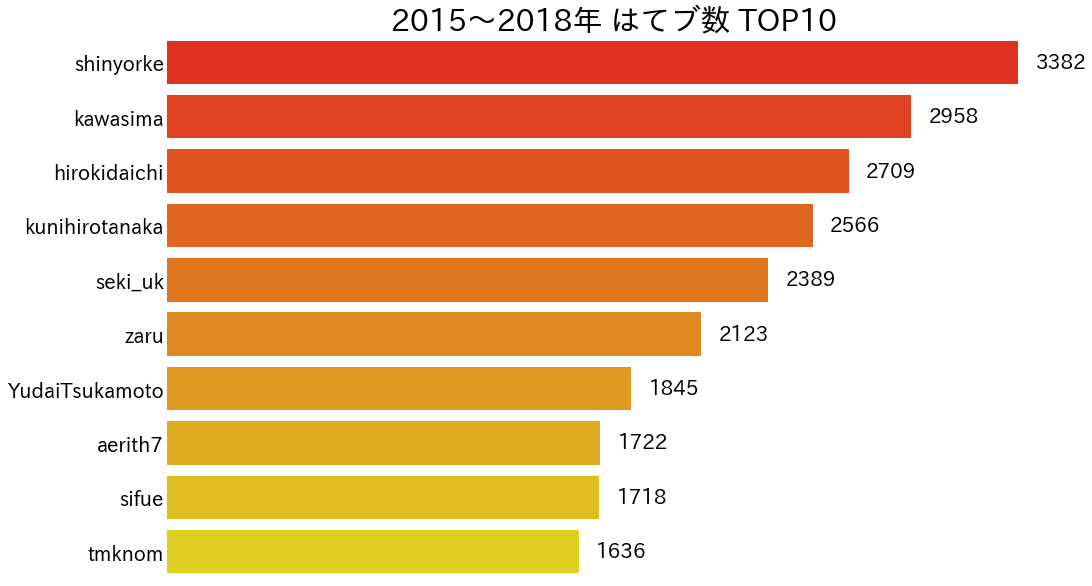

In [152]:
s = df.groupby('author')['はてブ数'].sum().sort_values(ascending=False)[:10]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'author': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2015〜2018年 はてブ数 TOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

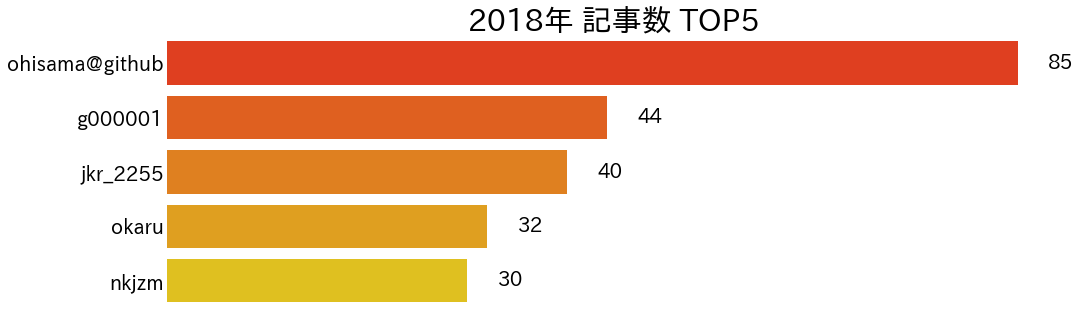

In [106]:
s = df2018.groupby('author').size().sort_values(ascending=False)[:5]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'author': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 記事数 TOP5', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

# 日付によるいいね数

In [99]:
df['day'] = df['day'].fillna(0).astype(int)

Text(0,0.5,'')

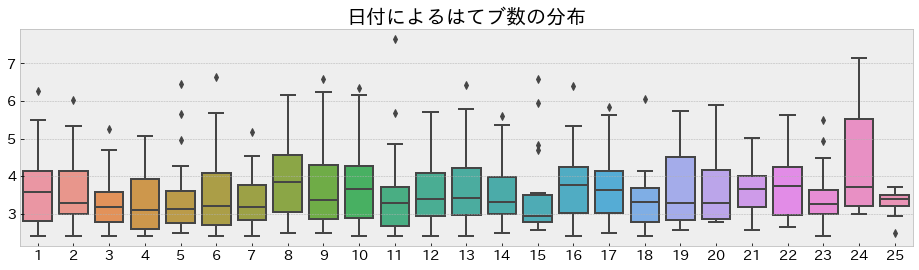

In [103]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df.query('day != 0').query('はてブ数 >= 10').sort_values('day'), x='day', y='はてブ数_log1p')
ax.set_title('日付によるはてブ数の分布(10以上に限定)', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('log(はてブ数)+1')

Text(0,0.5,'log(いいね数)+1')

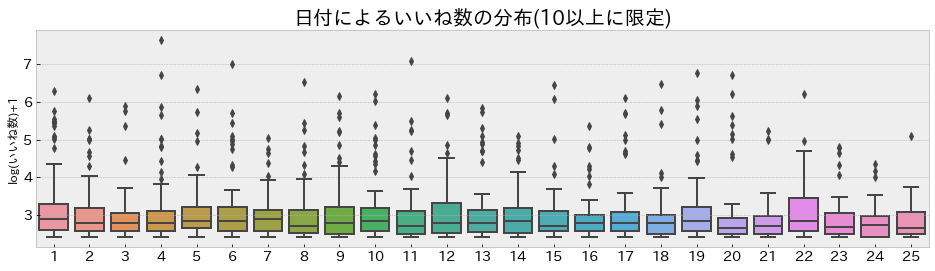

In [104]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df.query('day != 0').query('いいね数 >= 10').sort_values('day'), x='day', y='いいね数_log1p')
ax.set_title('日付によるいいね数の分布(10以上に限定)', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('log(いいね数)+1')

# いいね数とはてブ数の関係

In [72]:
df['いいね数_log1p'] = np.log1p(df['いいね数'])
df['はてブ数_log1p'] = np.log1p(df['はてブ数'])

In [73]:
df_qiita = df[df['url'].str.contains('http://qiita.com', na=False)]

Text(0.5,1.02,'いいね数とはてブ数の関係(Qiita記事に限定)')

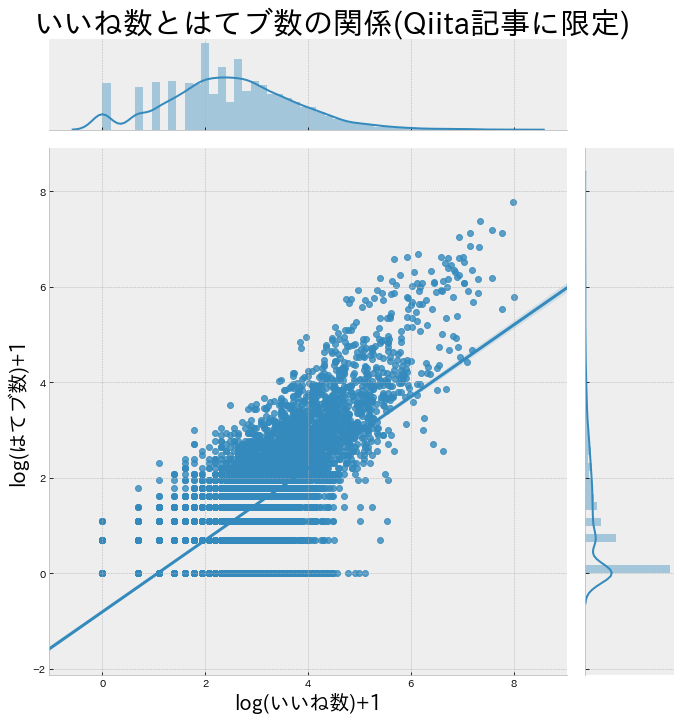

In [77]:
p = sns.jointplot(x='いいね数_log1p', y='はてブ数_log1p', data=df_qiita, kind="reg")
p.fig.set_figwidth(10)
p.fig.set_figheight(10)
p.set_axis_labels('log(いいね数)+1', 'log(はてブ数)+1', fontsize=20)
p.fig.suptitle('いいね数とはてブ数の関係(Qiita記事に限定)', fontsize=30, y=1.02)

Text(0.5,1,'いいね数のパレート図')

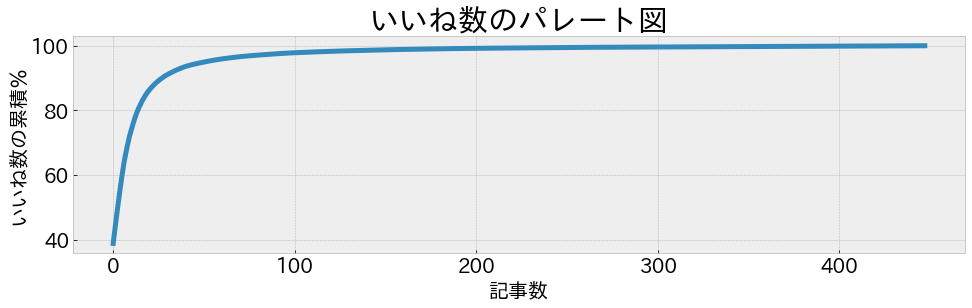

In [159]:
s = df.groupby('いいね数').size().sort_values(ascending=False)
sum_ = s.sum()
tmp_df = pd.concat([s, s.cumsum(), 100*s.cumsum()/sum_], axis=1)
tmp_df.columns = ['number', 'cumsum', 'cumsum_percent']

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)

n = tmp_df.shape[0]
x = np.arange(0, n)
ax.plot(x, tmp_df['cumsum_percent'], linewidth=5)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('記事数', fontsize=20)
ax.set_ylabel('いいね数の累積％', fontsize=20)
ax.set_title('いいね数のパレート図', fontsize=30)

Text(0.5,1,'はてブ数のパレート図')

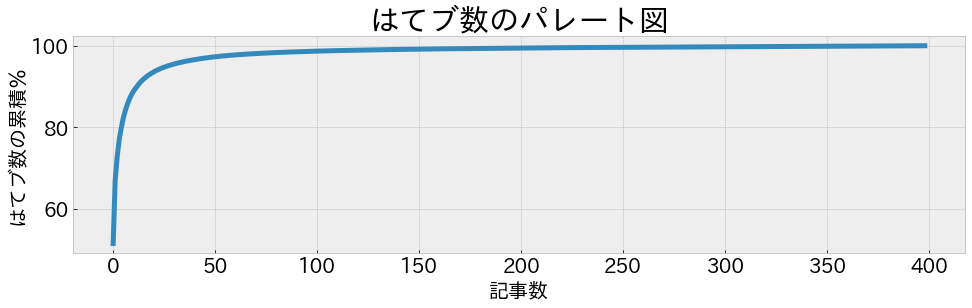

In [160]:
s = df.groupby('はてブ数').size().sort_values(ascending=False)
sum_ = s.sum()
tmp_df = pd.concat([s, s.cumsum(), 100*s.cumsum()/sum_], axis=1)
tmp_df.columns = ['number', 'cumsum', 'cumsum_percent']

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)

n = tmp_df.shape[0]
x = np.arange(0, n)
ax.plot(x, tmp_df['cumsum_percent'], linewidth=5)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('記事数', fontsize=20)
ax.set_ylabel('はてブ数の累積％', fontsize=20)
ax.set_title('はてブ数のパレート図', fontsize=30)

In [80]:
def plot_hist(s, title, bins=30, xlabel='', ylabel=''):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 1, 1)

    mean =s.mean().round(2)
    median = s.median().round(2)
    std = s.std().round(2)

    sns.distplot(s, ax=ax, bins=bins, kde_kws={"color": "k", "lw": 3})
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 20)
    vals = ax.get_yticks()
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    ax.text( 0.99, 0.99, f"平均値: {mean:.2f} \n 中央値: {median:.2f} \n 標準偏差: {std:.2f}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=20)

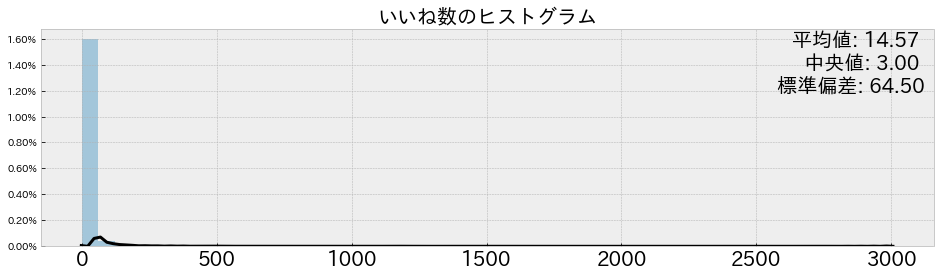

In [81]:
plot_hist(df['いいね数'], 'いいね数のヒストグラム', bins=50)

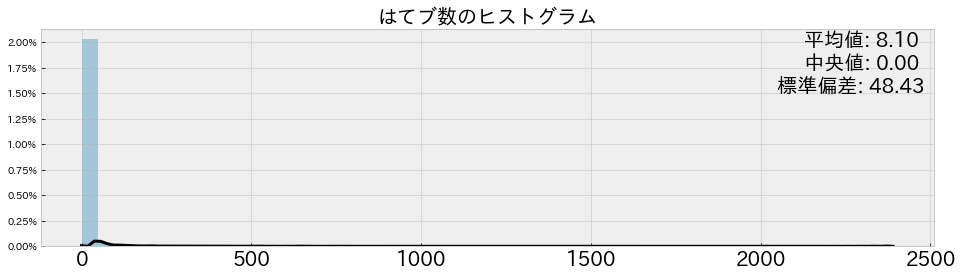

In [82]:
plot_hist(df['はてブ数'], 'はてブ数のヒストグラム', bins=50)